In [13]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [15]:
! mkdir ~/.kaggle


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [16]:
!mv kaggle\ \(1\).json ~/.kaggle/kaggle.json

In [18]:
!chmod 600 ~/.kaggle/kaggle.json

In [19]:
!kaggle datasets list

ref                                                    title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset            📚 Students Performance Dataset 📚                  66KB  2024-06-12 23:09:20          17970        393  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024      Most Streamed Spotify Songs 2024                 496KB  2024-06-15 18:50:51          13486        286  1.0              
ihelon/coffee-sales                                    Coffee Sales                                      11KB  2024-07-18 10:06:43           4992         87  1.0              
adarshde/electric-vehicle-population-dataset           Electric Vehicle Population DataSet                6MB  2024-07-1

In [20]:
!kaggle datasets download -d quantbruce/real-estate-price-prediction

Dataset URL: https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction
License(s): other
  0% 0.00/6.98k [00:00<?, ?B/s]
100% 6.98k/6.98k [00:00<00:00, 15.2MB/s]


In [22]:
!unzip real-estate-price-prediction.zip

Archive:  real-estate-price-prediction.zip
  inflating: Real estate.csv         


In [24]:
import pandas as pd
df = pd.read_csv("Real estate.csv")
print(df.head())

   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391  

In [25]:
print(df.isnull().sum())

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


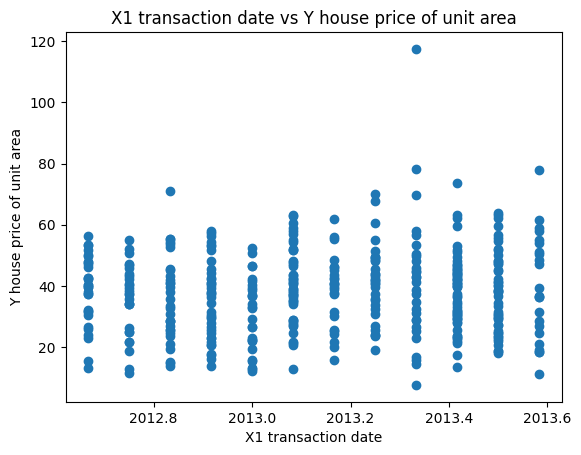

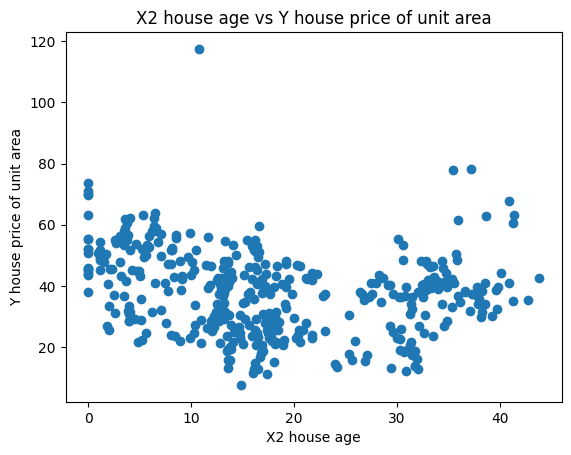

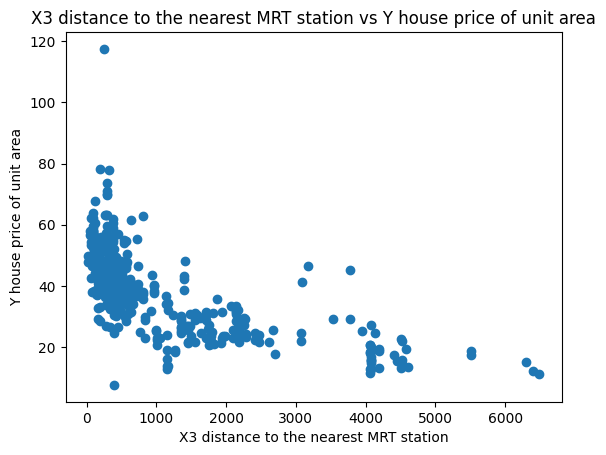

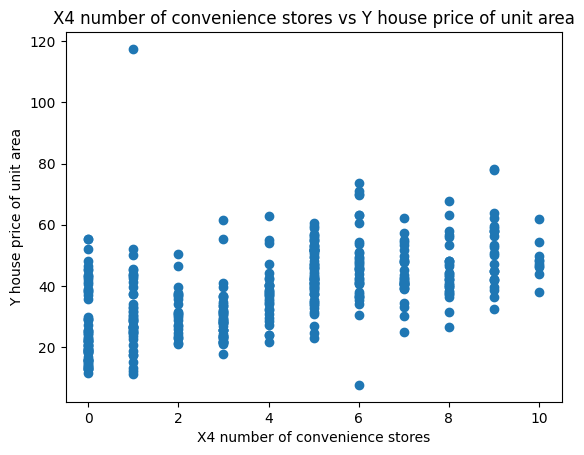

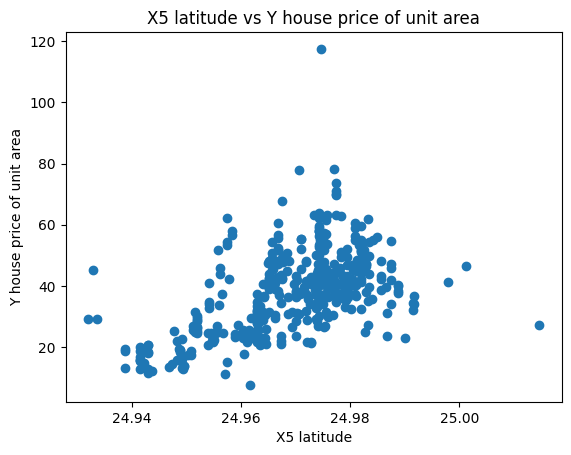

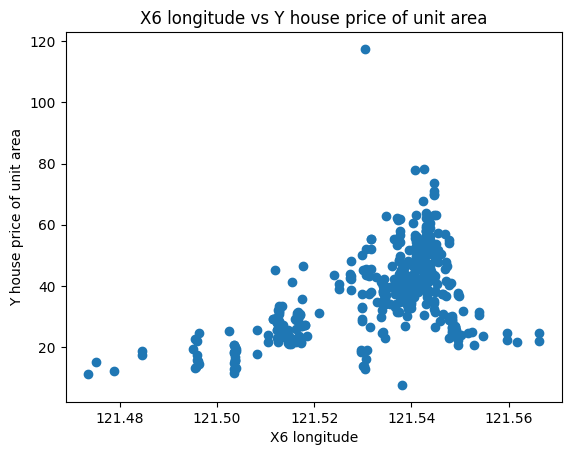

In [26]:
import matplotlib.pyplot as plt

for column in df.columns[1:-1]:
    plt.scatter(df[column], df[df.columns[-1]])
    plt.xlabel(column)
    plt.ylabel(df.columns[-1])
    plt.title(f'{column} vs {df.columns[-1]}')
    plt.show()


In [27]:
df = df.drop(columns=['No'])
print(df.head())


   X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
0             2012.917          32.0                                84.87882   
1             2012.917          19.5                               306.59470   
2             2013.583          13.3                               561.98450   
3             2013.500          13.3                               561.98450   
4             2012.833           5.0                               390.56840   

   X4 number of convenience stores  X5 latitude  X6 longitude  \
0                               10     24.98298     121.54024   
1                                9     24.98034     121.53951   
2                                5     24.98746     121.54391   
3                                5     24.98746     121.54391   
4                                5     24.97937     121.54245   

   Y house price of unit area  
0                        37.9  
1                        42.2  
2                        47.3  


In [28]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [35]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.coefficients = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        self.coefficients = np.zeros(X_b.shape[1])
        m = len(y)

        for _ in range(self.epochs):
            gradients = 2/m * X_b.T.dot(X_b.dot(self.coefficients) - y)
            self.coefficients -= self.learning_rate * gradients

    def predict(self, X):
        if self.coefficients is None:
            raise ValueError("The model is not fitted yet.")
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.coefficients)


In [36]:

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [37]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Custom Model - MSE: {mse}, R²: {r2}')


Custom Model - MSE: 69.04778198840725, R²: 0.5646930570112327


In [38]:
from sklearn.linear_model import LinearRegression as SklearnLinearRegression

sklearn_model = SklearnLinearRegression()
sklearn_model.fit(X_train, y_train)

y_pred_sklearn = sklearn_model.predict(X_test)

mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

print(f'Sklearn Model - MSE: {mse_sklearn}, R²: {r2_sklearn}')


Sklearn Model - MSE: 66.67336271835958, R²: 0.5796624182861772


In [39]:
best_mse = float('inf')
best_lr = None
best_epochs = None

for lr in [0.001, 0.01, 0.1]:
    for epochs in [500, 1000, 2000]:
        model = LinearRegression(learning_rate=lr, epochs=epochs)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)

        if mse < best_mse:
            best_mse = mse
            best_lr = lr
            best_epochs = epochs

print(f'Best MSE: {best_mse} with learning rate: {best_lr} and epochs: {best_epochs}')


Best MSE: 65.10548974150609 with learning rate: 0.1 and epochs: 500
